### Scaling Exercises

Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
from env import host, user, password

In [2]:
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    It takes in a string name of a database as an argument.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
def new_telco_data():
    '''
    This function reads the iris data from the Codeup db into a df.
    '''
    sql_query = """
                select * from customers
                join contract_types using (contract_type_id)
                join internet_service_types using (internet_service_type_id)
                join payment_types using (payment_type_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('telco_churn'))
    
    return df

In [37]:
df = new_telco_data()
df.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,1,1,2,2794-XIMMO,Male,0,Yes,No,53,No,...,Yes,Yes,Yes,Yes,60.45,3184.25,Yes,One year,DSL,Electronic check
1,1,1,2,2851-STERV,Male,1,No,No,35,Yes,...,Yes,Yes,Yes,Yes,73.00,2471.25,No,One year,DSL,Electronic check
2,1,1,2,2898-LSJGD,Female,0,Yes,Yes,21,No,...,No,Yes,Yes,Yes,55.95,1157.05,Yes,One year,DSL,Electronic check


In [38]:
# prepare telco
df.drop_duplicates(inplace = True)
df = df.replace(r'^\s*$', np.nan, regex = True)
df.total_charges = df.total_charges.astype('float64')
df.senior_citizen = df.senior_citizen.replace({0:'No', 1:'Yes'})
df.dropna(inplace = True)
df = df.drop(columns = ['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7032 non-null   object 
 1   senior_citizen         7032 non-null   object 
 2   partner                7032 non-null   object 
 3   dependents             7032 non-null   object 
 4   tenure                 7032 non-null   int64  
 5   phone_service          7032 non-null   object 
 6   multiple_lines         7032 non-null   object 
 7   online_security        7032 non-null   object 
 8   online_backup          7032 non-null   object 
 9   device_protection      7032 non-null   object 
 10  tech_support           7032 non-null   object 
 11  streaming_tv           7032 non-null   object 
 12  streaming_movies       7032 non-null   object 
 13  paperless_billing      7032 non-null   object 
 14  monthly_charges        7032 non-null   float64
 15  tota

1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [40]:
train_and_validate, test = train_test_split(df, random_state=123)
train, validate = train_test_split(train_and_validate)
test.shape, train.shape, validate.shape

((1758, 20), (3955, 20), (1319, 20))

In [41]:
num_cols = list(train.select_dtypes(exclude = object).columns)

In [42]:
# Min Max Scaler
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(train[['tenure', 'monthly_charges', 'total_charges']])

train_scaled = scaler.transform(train[['tenure', 'monthly_charges', 'total_charges']])
validate_scaled = scaler.transform(validate[['tenure', 'monthly_charges', 'total_charges']])
test_scaled = scaler.transform(test[['tenure', 'monthly_charges', 'total_charges']])
train_scaled[:10]

array([[0.78873239, 0.20945274, 0.24147381],
       [0.4084507 , 0.07064677, 0.08128941],
       [0.46478873, 0.31791045, 0.20729983],
       [0.26760563, 0.65771144, 0.1992107 ],
       [0.29577465, 0.8199005 , 0.27661134],
       [0.53521127, 0.72089552, 0.39169393],
       [0.01408451, 0.25970149, 0.0072006 ],
       [0.32394366, 0.70945274, 0.25020915],
       [0.        , 0.55870647, 0.00641015],
       [0.43661972, 0.36218905, 0.20900767]])

In [43]:
# add scaled values back to split dataframes
train[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(train[['tenure', 'monthly_charges', 'total_charges']])
validate[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(validate[['tenure', 'monthly_charges', 'total_charges']])
test[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(test[['tenure', 'monthly_charges', 'total_charges']])

/Users/davidrodriguez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/davidrodriguez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/davidrodriguez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

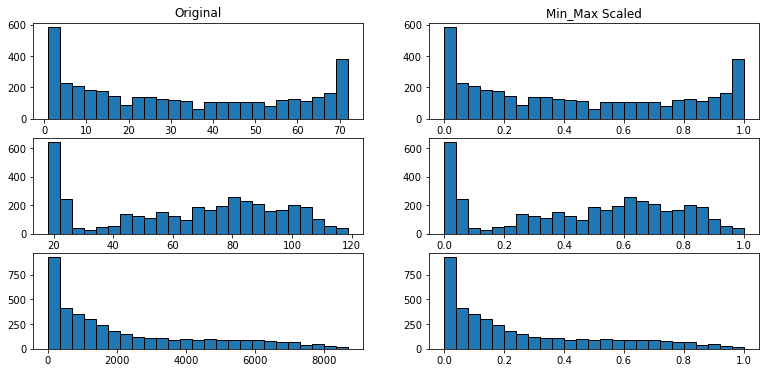

In [50]:
plt.figure(figsize=(13, 6))
plt.subplot(321)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')
plt.subplot(322)
plt.hist(train.tenure_scaled, bins=25, ec='black')
plt.title('Min_Max Scaled')
plt.subplot(323)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.subplot(324)
plt.hist(train.monthly_charges_scaled, bins=25, ec='black')
plt.subplot(325)
plt.hist(train.total_charges, bins=25, ec='black')
plt.subplot(326)
plt.hist(train.total_charges_scaled, bins=25, ec='black');

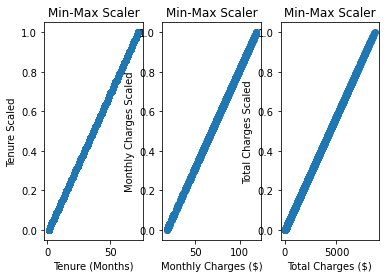

In [52]:
plt.subplot(131)
plt.scatter(train.tenure, train.tenure_scaled)
plt.xlabel('Tenure (Months)')
plt.ylabel('Tenure Scaled')
plt.title('Min-Max Scaler')
plt.subplot(132)
plt.scatter(train.monthly_charges, train.monthly_charges_scaled)
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Monthly Charges Scaled')
plt.title('Min-Max Scaler')
plt.subplot(133)
plt.scatter(train.total_charges, train.total_charges_scaled)
plt.xlabel('Total Charges ($)')
plt.ylabel('Total Charges Scaled')
plt.title('Min-Max Scaler');

In [53]:
# Standard Scaler
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(train[['tenure', 'monthly_charges', 'total_charges']])

train_scaled = scaler.transform(train[['tenure', 'monthly_charges', 'total_charges']])
validate_scaled = scaler.transform(validate[['tenure', 'monthly_charges', 'total_charges']])
test_scaled = scaler.transform(test[['tenure', 'monthly_charges', 'total_charges']])

In [54]:
# add scaled values back to split dataframes
train[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(train[['tenure', 'monthly_charges', 'total_charges']])
validate[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(validate[['tenure', 'monthly_charges', 'total_charges']])
test[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(test[['tenure', 'monthly_charges', 'total_charges']])

/Users/davidrodriguez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/davidrodriguez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/davidrodriguez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

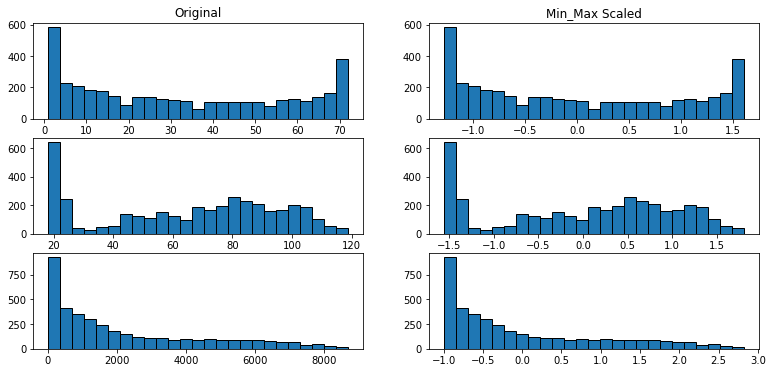

In [55]:
plt.figure(figsize=(13, 6))
plt.subplot(321)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')
plt.subplot(322)
plt.hist(train.tenure_scaled, bins=25, ec='black')
plt.title('Standard Scaled')
plt.subplot(323)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.subplot(324)
plt.hist(train.monthly_charges_scaled, bins=25, ec='black')
plt.subplot(325)
plt.hist(train.total_charges, bins=25, ec='black')
plt.subplot(326)
plt.hist(train.total_charges_scaled, bins=25, ec='black');

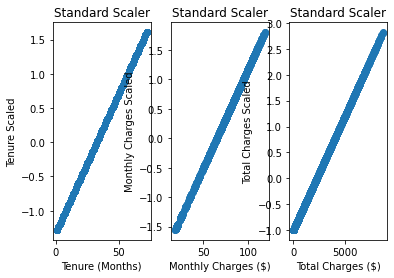

In [60]:
plt.subplot(131)
plt.scatter(train.tenure, train.tenure_scaled)
plt.xlabel('Tenure (Months)')
plt.ylabel('Tenure Scaled')
plt.title('Standard Scaler')
plt.subplot(132)
plt.scatter(train.monthly_charges, train.monthly_charges_scaled)
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Monthly Charges Scaled')
plt.title('Standard Scaler')
plt.subplot(133)
plt.scatter(train.total_charges, train.total_charges_scaled)
plt.xlabel('Total Charges ($)')
plt.ylabel('Total Charges Scaled')
plt.title('Standard Scaler');

In [61]:
# Robust Scaler
scaler = sklearn.preprocessing.RobustScaler()
scaler.fit(train[['tenure', 'monthly_charges', 'total_charges']])

train_scaled = scaler.transform(train[['tenure', 'monthly_charges', 'total_charges']])
validate_scaled = scaler.transform(validate[['tenure', 'monthly_charges', 'total_charges']])
test_scaled = scaler.transform(test[['tenure', 'monthly_charges', 'total_charges']])

In [62]:
# add scaled values back to split dataframes
train[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(train[['tenure', 'monthly_charges', 'total_charges']])
validate[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(validate[['tenure', 'monthly_charges', 'total_charges']])
test[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(test[['tenure', 'monthly_charges', 'total_charges']])

/Users/davidrodriguez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/davidrodriguez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/davidrodriguez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

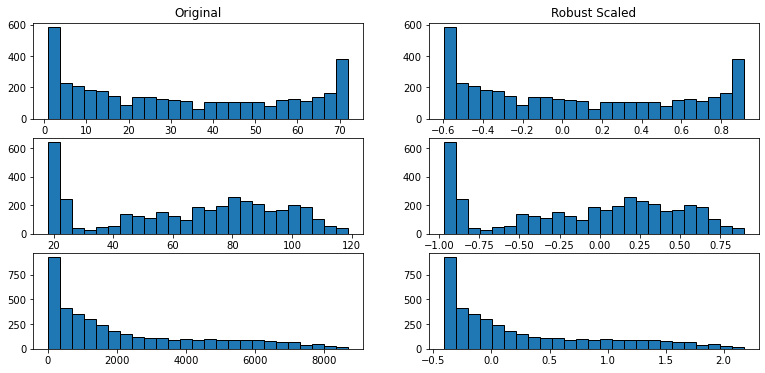

In [65]:
plt.figure(figsize=(13, 6))
plt.subplot(321)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')
plt.subplot(322)
plt.hist(train.tenure_scaled, bins=25, ec='black')
plt.title('Robust Scaled')
plt.subplot(323)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.subplot(324)
plt.hist(train.monthly_charges_scaled, bins=25, ec='black')
plt.subplot(325)
plt.hist(train.total_charges, bins=25, ec='black')
plt.subplot(326)
plt.hist(train.total_charges_scaled, bins=25, ec='black');

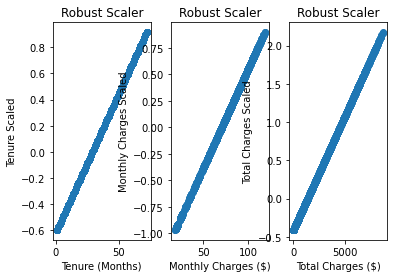

In [66]:
plt.subplot(131)
plt.scatter(train.tenure, train.tenure_scaled)
plt.xlabel('Tenure (Months)')
plt.ylabel('Tenure Scaled')
plt.title('Robust Scaler')
plt.subplot(132)
plt.scatter(train.monthly_charges, train.monthly_charges_scaled)
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Monthly Charges Scaled')
plt.title('Robust Scaler')
plt.subplot(133)
plt.scatter(train.total_charges, train.total_charges_scaled)
plt.xlabel('Total Charges ($)')
plt.ylabel('Total Charges Scaled')
plt.title('Robust Scaler');

In [67]:
# Non-Linear Scaler
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution = 'normal')
scaler.fit(train[['tenure', 'monthly_charges', 'total_charges']])

train_scaled = scaler.transform(train[['tenure', 'monthly_charges', 'total_charges']])
validate_scaled = scaler.transform(validate[['tenure', 'monthly_charges', 'total_charges']])
test_scaled = scaler.transform(test[['tenure', 'monthly_charges', 'total_charges']])

In [68]:
# add scaled values back to split dataframes
train[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(train[['tenure', 'monthly_charges', 'total_charges']])
validate[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(validate[['tenure', 'monthly_charges', 'total_charges']])
test[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(test[['tenure', 'monthly_charges', 'total_charges']])

/Users/davidrodriguez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/davidrodriguez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/davidrodriguez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

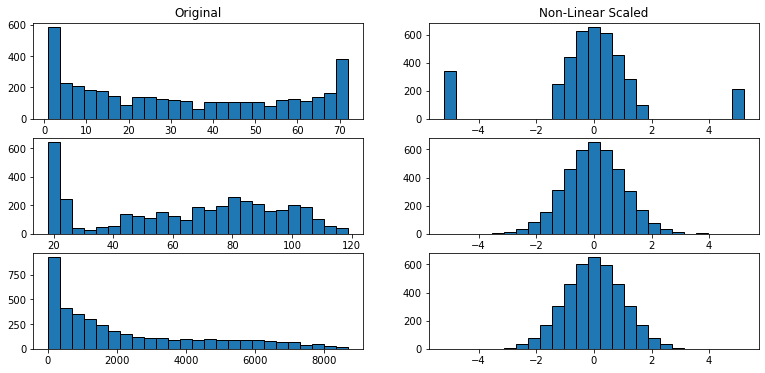

In [69]:
plt.figure(figsize=(13, 6))
plt.subplot(321)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')
plt.subplot(322)
plt.hist(train.tenure_scaled, bins=25, ec='black')
plt.title('Non-Linear Scaled')
plt.subplot(323)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.subplot(324)
plt.hist(train.monthly_charges_scaled, bins=25, ec='black')
plt.subplot(325)
plt.hist(train.total_charges, bins=25, ec='black')
plt.subplot(326)
plt.hist(train.total_charges_scaled, bins=25, ec='black');

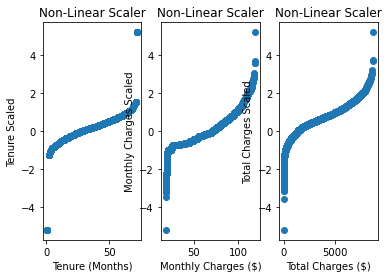

In [70]:
plt.subplot(131)
plt.scatter(train.tenure, train.tenure_scaled)
plt.xlabel('Tenure (Months)')
plt.ylabel('Tenure Scaled')
plt.title('Non-Linear Scaler')
plt.subplot(132)
plt.scatter(train.monthly_charges, train.monthly_charges_scaled)
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Monthly Charges Scaled')
plt.title('Non-Linear Scaler')
plt.subplot(133)
plt.scatter(train.total_charges, train.total_charges_scaled)
plt.xlabel('Total Charges ($)')
plt.ylabel('Total Charges Scaled')
plt.title('Non-Linear Scaler');

In [71]:
train.head(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,tenure_scaled,monthly_charges_scaled,total_charges_scaled
271,Male,No,No,No,57,No,No phone service,No,Yes,No,...,Yes,39.30,2111.45,Yes,Month-to-month,DSL,Electronic check,0.715218,-0.658425,0.278566
6380,Male,No,No,Yes,30,Yes,Yes,No internet service,No internet service,No internet service,...,No,25.35,723.30,No,One year,None,Bank transfer (automatic),0.033880,-0.809168,-0.412642
5560,Female,No,Yes,No,34,Yes,No,No,No,No,...,No,50.20,1815.30,No,Month-to-month,DSL,Bank transfer (automatic),0.127052,-0.444534,0.190068


In [72]:
validate.head(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,tenure_scaled,monthly_charges_scaled,total_charges_scaled
143,Male,No,No,No,1,Yes,No,No,No,No,...,Yes,45.65,45.65,Yes,Month-to-month,DSL,Electronic check,-5.199338,-0.540348,-1.733798
5952,Female,No,Yes,Yes,6,Yes,No,No internet service,No internet service,No internet service,...,No,19.70,113.50,No,Month-to-month,None,Mailed check,-0.846279,-1.649237,-1.183204
3927,Female,No,No,No,10,Yes,No,No,Yes,No,...,No,51.20,498.25,No,Month-to-month,DSL,Electronic check,-0.622621,-0.406987,-0.581350


In [73]:
test.head(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,tenure_scaled,monthly_charges_scaled,total_charges_scaled
6830,Female,No,No,No,63,Yes,No,No internet service,No internet service,No internet service,...,Yes,20.60,1298.70,No,Two year,None,Mailed check,0.928105,-1.050924,-0.050083
364,Male,No,Yes,No,56,Yes,Yes,Yes,No,No,...,Yes,100.55,5514.95,No,One year,Fiber optic,Electronic check,0.681594,1.189522,1.112737
2062,Male,No,No,No,1,Yes,Yes,No,No,No,...,Yes,75.30,75.30,Yes,Month-to-month,Fiber optic,Electronic check,-5.199338,0.154930,-1.380310


2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [76]:
# Min Max Scaler
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(train[['tenure', 'monthly_charges', 'total_charges']])

train_scaled = scaler.transform(train[['tenure', 'monthly_charges', 'total_charges']])
validate_scaled = scaler.transform(validate[['tenure', 'monthly_charges', 'total_charges']])
test_scaled = scaler.transform(test[['tenure', 'monthly_charges', 'total_charges']])
train_scaled[:10]

array([[0.78873239, 0.20945274, 0.24147381],
       [0.4084507 , 0.07064677, 0.08128941],
       [0.46478873, 0.31791045, 0.20729983],
       [0.26760563, 0.65771144, 0.1992107 ],
       [0.29577465, 0.8199005 , 0.27661134],
       [0.53521127, 0.72089552, 0.39169393],
       [0.01408451, 0.25970149, 0.0072006 ],
       [0.32394366, 0.70945274, 0.25020915],
       [0.        , 0.55870647, 0.00641015],
       [0.43661972, 0.36218905, 0.20900767]])

In [81]:
scaler.inverse_transform(train_scaled)

array([[  57.  ,   39.3 , 2111.45],
       [  30.  ,   25.35,  723.3 ],
       [  34.  ,   50.2 , 1815.3 ],
       ...,
       [  13.  ,  104.15, 1299.1 ],
       [  10.  ,   19.8 ,  196.75],
       [  13.  ,   66.4 ,  831.75]])

In [78]:
train[['tenure', 'monthly_charges', 'total_charges']]

,tenure,monthly_charges,total_charges
271,57,39.30,2111.45
6380,30,25.35,723.30
5560,34,50.20,1815.30
1955,20,84.35,1745.20
1766,22,100.65,2415.95
...,...,...,...
2645,50,90.10,4549.45
4771,64,66.15,4392.50
2624,13,104.15,1299.10
5718,10,19.80,196.75


In [82]:
# Standard Scaler
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(train[['tenure', 'monthly_charges', 'total_charges']])

train_scaled = scaler.transform(train[['tenure', 'monthly_charges', 'total_charges']])
validate_scaled = scaler.transform(validate[['tenure', 'monthly_charges', 'total_charges']])
test_scaled = scaler.transform(test[['tenure', 'monthly_charges', 'total_charges']])

In [83]:
scaler.inverse_transform(train_scaled)

array([[  57.  ,   39.3 , 2111.45],
       [  30.  ,   25.35,  723.3 ],
       [  34.  ,   50.2 , 1815.3 ],
       ...,
       [  13.  ,  104.15, 1299.1 ],
       [  10.  ,   19.8 ,  196.75],
       [  13.  ,   66.4 ,  831.75]])

In [84]:
train[['tenure', 'monthly_charges', 'total_charges']]

,tenure,monthly_charges,total_charges
271,57,39.30,2111.45
6380,30,25.35,723.30
5560,34,50.20,1815.30
1955,20,84.35,1745.20
1766,22,100.65,2415.95
...,...,...,...
2645,50,90.10,4549.45
4771,64,66.15,4392.50
2624,13,104.15,1299.10
5718,10,19.80,196.75


In [85]:
# Robust Scaler
scaler = sklearn.preprocessing.RobustScaler()
scaler.fit(train[['tenure', 'monthly_charges', 'total_charges']])

train_scaled = scaler.transform(train[['tenure', 'monthly_charges', 'total_charges']])
validate_scaled = scaler.transform(validate[['tenure', 'monthly_charges', 'total_charges']])
test_scaled = scaler.transform(test[['tenure', 'monthly_charges', 'total_charges']])

In [86]:
scaler.inverse_transform(train_scaled)

array([[  57.  ,   39.3 , 2111.45],
       [  30.  ,   25.35,  723.3 ],
       [  34.  ,   50.2 , 1815.3 ],
       ...,
       [  13.  ,  104.15, 1299.1 ],
       [  10.  ,   19.8 ,  196.75],
       [  13.  ,   66.4 ,  831.75]])

In [87]:
train[['tenure', 'monthly_charges', 'total_charges']]

,tenure,monthly_charges,total_charges
271,57,39.30,2111.45
6380,30,25.35,723.30
5560,34,50.20,1815.30
1955,20,84.35,1745.20
1766,22,100.65,2415.95
...,...,...,...
2645,50,90.10,4549.45
4771,64,66.15,4392.50
2624,13,104.15,1299.10
5718,10,19.80,196.75


In [88]:
# Non-Linear Scaler
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution = 'normal')
scaler.fit(train[['tenure', 'monthly_charges', 'total_charges']])

train_scaled = scaler.transform(train[['tenure', 'monthly_charges', 'total_charges']])
validate_scaled = scaler.transform(validate[['tenure', 'monthly_charges', 'total_charges']])
test_scaled = scaler.transform(test[['tenure', 'monthly_charges', 'total_charges']])

In [89]:
scaler.inverse_transform(train_scaled)

array([[  57.  ,   39.3 , 2111.45],
       [  30.  ,   25.35,  723.3 ],
       [  34.  ,   50.2 , 1815.3 ],
       ...,
       [  13.  ,  104.15, 1299.1 ],
       [  10.  ,   19.8 ,  196.75],
       [  13.  ,   66.4 ,  831.75]])

In [90]:
train[['tenure', 'monthly_charges', 'total_charges']]

,tenure,monthly_charges,total_charges
271,57,39.30,2111.45
6380,30,25.35,723.30
5560,34,50.20,1815.30
1955,20,84.35,1745.20
1766,22,100.65,2415.95
...,...,...,...
2645,50,90.10,4549.45
4771,64,66.15,4392.50
2624,13,104.15,1299.10
5718,10,19.80,196.75


3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [91]:
# Non-Linear Scaler
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution = 'normal')
scaler.fit(train[['tenure', 'monthly_charges', 'total_charges']])

train_scaled = scaler.transform(train[['tenure', 'monthly_charges', 'total_charges']])
validate_scaled = scaler.transform(validate[['tenure', 'monthly_charges', 'total_charges']])
test_scaled = scaler.transform(test[['tenure', 'monthly_charges', 'total_charges']])

In [92]:
# add scaled values back to split dataframes
train[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(train[['tenure', 'monthly_charges', 'total_charges']])
validate[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(validate[['tenure', 'monthly_charges', 'total_charges']])
test[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(test[['tenure', 'monthly_charges', 'total_charges']])

/Users/davidrodriguez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/davidrodriguez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/davidrodriguez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

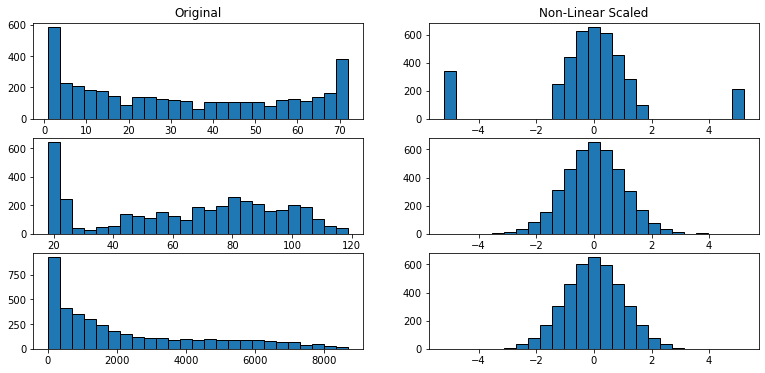

In [93]:
plt.figure(figsize=(13, 6))
plt.subplot(321)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')
plt.subplot(322)
plt.hist(train.tenure_scaled, bins=25, ec='black')
plt.title('Non-Linear Scaled')
plt.subplot(323)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.subplot(324)
plt.hist(train.monthly_charges_scaled, bins=25, ec='black')
plt.subplot(325)
plt.hist(train.total_charges, bins=25, ec='black')
plt.subplot(326)
plt.hist(train.total_charges_scaled, bins=25, ec='black');

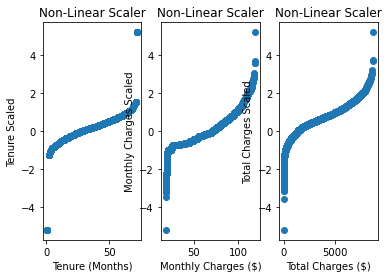

In [94]:
plt.subplot(131)
plt.scatter(train.tenure, train.tenure_scaled)
plt.xlabel('Tenure (Months)')
plt.ylabel('Tenure Scaled')
plt.title('Non-Linear Scaler')
plt.subplot(132)
plt.scatter(train.monthly_charges, train.monthly_charges_scaled)
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Monthly Charges Scaled')
plt.title('Non-Linear Scaler')
plt.subplot(133)
plt.scatter(train.total_charges, train.total_charges_scaled)
plt.xlabel('Total Charges ($)')
plt.ylabel('Total Charges Scaled')
plt.title('Non-Linear Scaler');

4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [95]:
# Non-Linear Scaler
scaler = sklearn.preprocessing.QuantileTransformer()
scaler.fit(train[['tenure', 'monthly_charges', 'total_charges']])

train_scaled = scaler.transform(train[['tenure', 'monthly_charges', 'total_charges']])
validate_scaled = scaler.transform(validate[['tenure', 'monthly_charges', 'total_charges']])
test_scaled = scaler.transform(test[['tenure', 'monthly_charges', 'total_charges']])

In [96]:
# add scaled values back to split dataframes
train[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(train[['tenure', 'monthly_charges', 'total_charges']])
validate[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(validate[['tenure', 'monthly_charges', 'total_charges']])
test[['tenure_scaled', 'monthly_charges_scaled', 'total_charges_scaled']] = scaler.transform(test[['tenure', 'monthly_charges', 'total_charges']])

/Users/davidrodriguez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/davidrodriguez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/davidrodriguez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

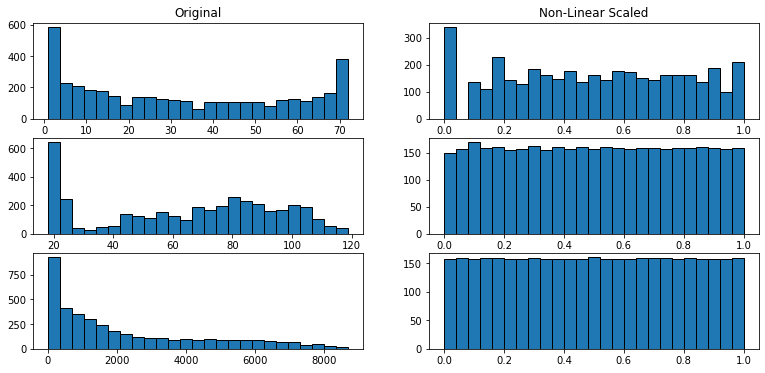

In [97]:
plt.figure(figsize=(13, 6))
plt.subplot(321)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original')
plt.subplot(322)
plt.hist(train.tenure_scaled, bins=25, ec='black')
plt.title('Non-Linear Scaled')
plt.subplot(323)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.subplot(324)
plt.hist(train.monthly_charges_scaled, bins=25, ec='black')
plt.subplot(325)
plt.hist(train.total_charges, bins=25, ec='black')
plt.subplot(326)
plt.hist(train.total_charges_scaled, bins=25, ec='black');

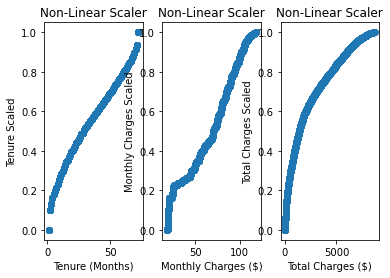

In [98]:
plt.subplot(131)
plt.scatter(train.tenure, train.tenure_scaled)
plt.xlabel('Tenure (Months)')
plt.ylabel('Tenure Scaled')
plt.title('Non-Linear Scaler')
plt.subplot(132)
plt.scatter(train.monthly_charges, train.monthly_charges_scaled)
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Monthly Charges Scaled')
plt.title('Non-Linear Scaler')
plt.subplot(133)
plt.scatter(train.total_charges, train.total_charges_scaled)
plt.xlabel('Total Charges ($)')
plt.ylabel('Total Charges Scaled')
plt.title('Non-Linear Scaler');

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [107]:
def minmax_scaler_tvt(train, validate, test):
    # list of columns float and int dtypes
    num_cols = list(train.select_dtypes(include = ['float64', 'int64', 'complex']).columns)
    
    # min-max scaler object
    scaler = sklearn.preprocessing.MinMaxScaler()
    
    # fit scaler
    scaler.fit(train[num_cols])
    
    # scale
    train_scaled = scaler.transform(train[num_cols])
    validate_scaled = scaler.transform(validate[num_cols])
    test_scaled = scaler.transform(test[num_cols])

   # new column names
    new_column_names = [c + '_scaled' for c in num_cols]

    # add scaled columns to input dataset
    train[new_column_names] = scaler.transform(train[num_cols])
    validate[new_column_names] = scaler.transform(train[num_cols])
    test[new_column_names] = scaler.transform(train[num_cols])
    
    return train, validate, test

def standard_scaler_tvt(train, validate, test):
    # list of columns float and int dtypes
    num_cols = list(train.select_dtypes(include = ['float64', 'int64', 'complex']).columns)
    
    # standard scaler object
    scaler = sklearn.preprocessing.StandardScaler()
    
    # fit scaler
    scaler.fit(train[num_cols])
    
    # scale
    train_scaled = scaler.transform(train[num_cols])
    validate_scaled = scaler.transform(validate[num_cols])
    test_scaled = scaler.transform(test[num_cols])

    # new column names
    new_column_names = [c + '_scaled' for c in num_cols]

    # add scaled columns to input dataset
    train[new_column_names] = scaler.transform(train[num_cols])
    validate[new_column_names] = scaler.transform(train[num_cols])
    test[new_column_names] = scaler.transform(train[num_cols])
    
    return train, validate, test

def robust_scaler_tvt(train, validate, test):
    # list of columns float and int dtypes
    num_cols = list(train.select_dtypes(include = ['float64', 'int64', 'complex']).columns)
    
    # robust scaler object
    scaler = sklearn.preprocessing.RobustScaler()
    
    # fit scaler
    scaler.fit(train[num_cols])
    
    # scale
    train_scaled = scaler.transform(train[num_cols])
    validate_scaled = scaler.transform(validate[num_cols])
    test_scaled = scaler.transform(test[num_cols])

    # new column names
    new_column_names = [c + '_scaled' for c in num_cols]

    # add scaled columns to input dataset
    train[new_column_names] = scaler.transform(train[num_cols])
    validate[new_column_names] = scaler.transform(train[num_cols])
    test[new_column_names] = scaler.transform(train[num_cols])
    
    return train, validate, test

def nonlinear_scaler_tvt(train, validate, test):
    # list of columns float and int dtypes
    num_cols = list(train.select_dtypes(include = ['float64', 'int64', 'complex']).columns)
    
    # non-linear scaler object
    scaler = sklearn.preprocessing.QuantileTransformer(output_distribution = 'normal')
    
    # fit scaler
    scaler.fit(train[num_cols])
    
    # scale
    train_scaled = scaler.transform(train[num_cols])
    validate_scaled = scaler.transform(validate[num_cols])
    test_scaled = scaler.transform(test[num_cols])
    
    # new column names
    new_column_names = [c + '_scaled' for c in num_cols]

    # add scaled columns to input dataset
    train[new_column_names] = scaler.transform(train[num_cols])
    validate[new_column_names] = scaler.transform(train[num_cols])
    test[new_column_names] = scaler.transform(train[num_cols])

    return train, validate, test

In [105]:
train_and_validate, test = train_test_split(df, random_state=123)
train, validate = train_test_split(train_and_validate)
test.shape, train.shape, validate.shape

((1758, 20), (3955, 20), (1319, 20))

In [106]:
train,validate, test = minmax_scaler_tvt(train, validate, test)
train.head()

/Users/davidrodriguez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/davidrodriguez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/davidrodriguez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,tenure_scaled,monthly_charges_scaled,total_charges_scaled
6491,Male,No,Yes,No,50,Yes,No,No internet service,No internet service,No internet service,...,No,19.80,1013.20,No,Two year,None,Electronic check,0.690141,0.012475,0.114742
2561,Male,No,Yes,Yes,57,Yes,No,No,Yes,Yes,...,Yes,97.55,5598.00,No,One year,Fiber optic,Credit card (automatic),0.788732,0.788423,0.643801
3944,Male,No,No,No,14,No,No phone service,No,No,Yes,...,Yes,55.00,771.95,No,Month-to-month,DSL,Electronic check,0.183099,0.363772,0.086903
5636,Male,No,Yes,Yes,67,Yes,No,No internet service,No internet service,No internet service,...,Yes,19.40,1284.20,No,Two year,None,Credit card (automatic),0.929577,0.008483,0.146014
3905,Male,No,No,No,1,No,No phone service,No,No,No,...,No,35.90,35.90,Yes,Month-to-month,DSL,Electronic check,0.000000,0.173154,0.001967
